# Task 4.4. Equalizing histogram of color images 3.1. - 3.5.
---
***Author: Piotr Skalski***

## Imports

In [1]:
import numpy as np
import cv2
import os

import matplotlib.pyplot as plt
%matplotlib inline

## Settings

In [2]:
SOURCE_DIR = "./../data/"
IMAGE_NAME = "lenaRGB.bmp"

## Loading images

In [8]:
# building path to file
image_path = os.path.join(SOURCE_DIR, IMAGE_NAME)
# loading files
image = cv2.imread(image_path)

## Display image

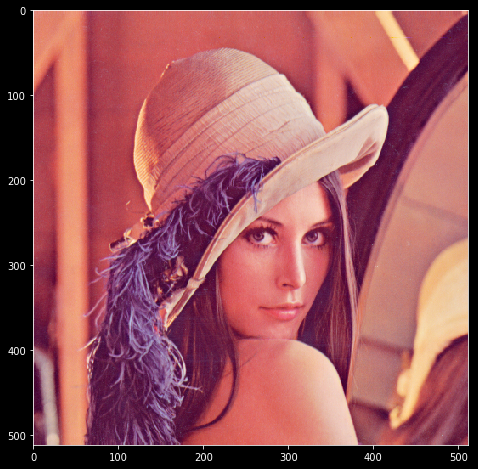

In [11]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
def draw_image_histogram(image, channels, color='k'):
    hist = cv2.calcHist([image], channels, None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

def show_color_histogram(image):
    plt.style.use('dark_background')
    fig = plt.figure(figsize=(8,8))
    for i, col in enumerate(['b', 'g', 'r']):
        draw_image_histogram(image, [i], color=col)
    plt.show()

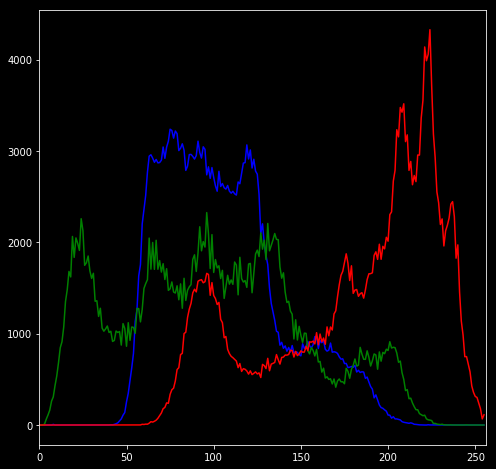

In [17]:
show_color_histogram(image)

## Straightforward histogram equalization

In [31]:
image_eq = cv2.merge(tuple(cv2.equalizeHist(channel) for channel in cv2.split(image)))

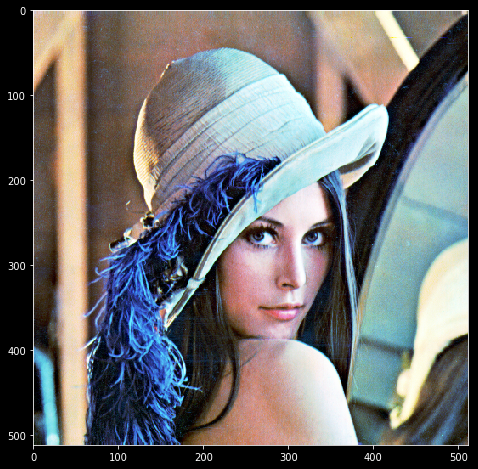

In [32]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
plt.imshow(cv2.cvtColor(image_eq, cv2.COLOR_BGR2RGB))
plt.show()

## Use of HSV

In [33]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

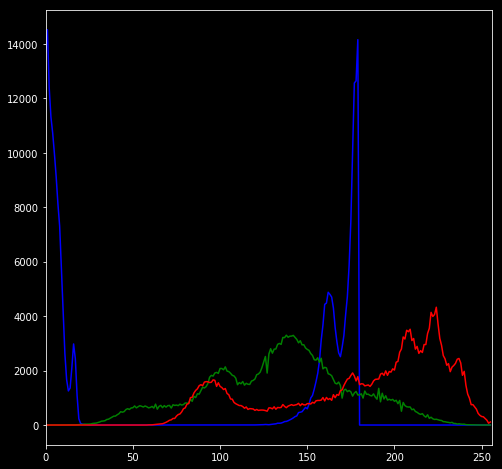

In [34]:
show_color_histogram(image_hsv)

In [48]:
image_hsv_splitted = cv2.split(image_hsv)
image_hsv_splitted[2] = cv2.equalizeHist(image_hsv_splitted[2])
image_hsv_eq = cv2.merge(image_hsv_splitted)
image_bgr_eq = cv2.cvtColor(image_hsv_eq, cv2.COLOR_HSV2BGR)

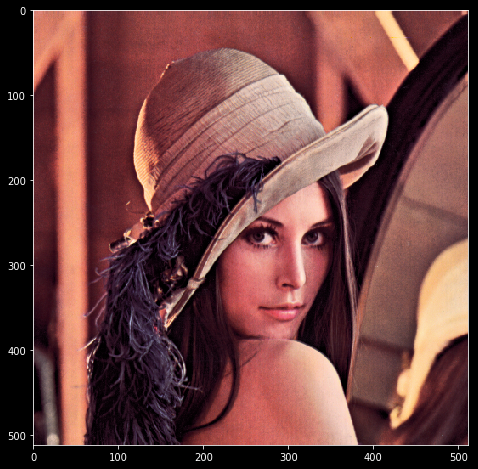

In [50]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
plt.imshow(cv2.cvtColor(image_bgr_eq, cv2.COLOR_BGR2RGB))
plt.show()

## RGB and HSV channels

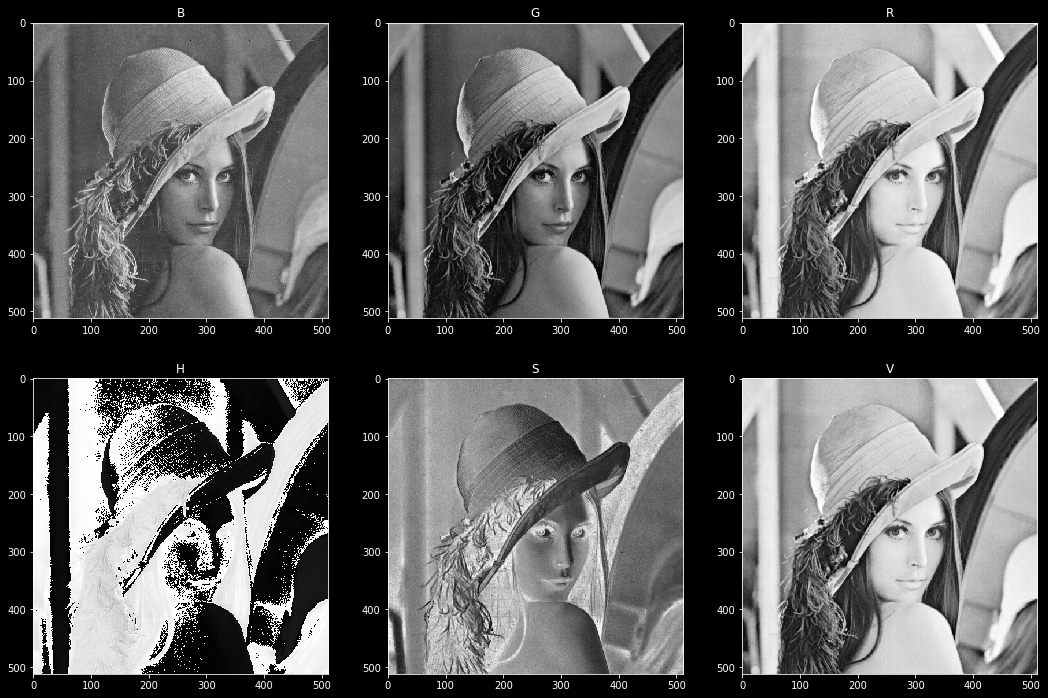

In [53]:
f, axarr = plt.subplots(2, 3, figsize=(18, 12))
for index, (channel_name, chanel) in enumerate(zip(("B", "G", "R"), cv2.split(image))):
    axarr[0, index].imshow(chanel,'gray')
    axarr[0, index].set_title(channel_name)
for index, (channel_name, chanel) in enumerate(zip(("H", "S", "V"), cv2.split(image_hsv))):
    axarr[1, index].imshow(chanel,'gray')
    axarr[1, index].set_title(channel_name)

## Resources

1. [How to Display a Matplotlib RGB Image](https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/)